In [ ]:
# 하루 단위로 파가격 크롤링 
url = "https://www.kamis.or.kr/customer/price/product/item.do?action=priceinfo&regday={}&itemcategorycode=200&itemcode=246&kindcode=&productrankcode=&convert_kg_yn=N"

period = pd.date_range('2015.01.01', '2016.01.01', freq='D').strftime('%Y-%m-%d') 

price_df = pd.DataFrame()

for date in period: 
    urls = url.format(date)
    df = pd.read_html(urls, header=0)[3].iloc[:3,1:2]
    price_df = price_df.append(df.T)
price_df.reset_index(drop=True, inplace=True)
date_df = pd.DataFrame(period)
price_df= pd.concat([date_df, price_df], axis=1)
price_df.columns = ["date", "avg_price", "max_price", "min_price"]

price_df

In [ ]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
import time 

In [ ]:
def weather(): 
    
    driver = webdriver.Chrome('./chromedriver')
    driver.get("https://data.kma.go.kr/climate/StatisticsDivision/selectStatisticsDivision.do?pgmNo=158")

    region = """//*[@id="btnStn"]"""
    driver.find_element_by_xpath(region).click()

    time.sleep(2)
    choose_all = """//*[@id="ztree_1_check"]"""
    driver.find_element_by_id("ztree_1_check").click()

    finish = """//*[@id="sidetreecontrol"]/a"""
    driver.find_element_by_xpath(finish).click()

    # 일별 선택 
    day = """//*[@id="dataFormCd"]/option[1]"""
    driver.find_element_by_xpath(day).click()

    
    df = pd.DataFrame()
    
    years = range(2018, 2022)
    months = range(1, 13)
    dates = range(1, 32)
    
    for year in years:   
        
        # 시작하는 년도: 끝나는 년도와 동일
        startYear = Select(driver.find_element_by_xpath('//*[@id="startYear"]'))
        startYear.select_by_value(f'{year}')

        # 끝나는 년도: 시작하는 년도랑 동일 
        endYear = Select(driver.find_element_by_xpath('//*[@id="endYear"]'))
        endYear.select_by_value(f'{year}')
        
        for month in months: 
           # try:
                time.sleep(0.2)
                startMonth = """//*[@id="startMonth"]/option[{}]"""
                driver.find_element_by_xpath(startMonth.format(month)).click()

                time.sleep(0.2)
                endMonth = """//*[@id="endMonth"]/option[{}]"""
                driver.find_element_by_xpath(endMonth.format(month)).click()

                for date in dates:

                    time.sleep(0.2)
                    startDate= """//*[@id="startDay"]/option[{}]"""
                    driver.find_element_by_xpath(startDate.format(date)).click()

                    time.sleep(0.2)
                    endDate= """//*[@id="endDay"]/option[{}]"""
                    driver.find_element_by_xpath(endDate.format(date)).click()

                    time.sleep(0.2)
                    search = """//*[@id="schForm"]/div[3]/button"""
                    driver.find_element_by_xpath(search).click()

                    soup = BeautifulSoup(driver.page_source, "lxml")
                    #print(soup.find_all('table'))
                    table = soup.find_all('table')[1]
                    df1 = pd.read_html(str(table),header=0)
                    df = df.append(df1)

                    if date is None: 
                        print("day is none")

            #except: 
             #   df = df.append(np.nan)

        return df

In [53]:
datas = pd.read_excel('dataPA.xlsx', index_col='date', parse_dates=True)
datas.head()

,avg_price,max_price,min_price,avg_temp,max_temp,min_temp,rain_fall,paddy,field,total_field,cons_price,agr_price
date,,,,,,,,,,,,
2021-05-04,3600,4000,3000,15.7,19.6,11.0,19.8,NaN,NaN,NaN,NaN,NaN
2021-05-03,3812,4160,3000,14.0,21.3,6.2,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-02,3532,3700,3000,12.0,18.0,7.2,2.3,NaN,NaN,NaN,NaN,NaN
2021-05-01,3532,3700,3000,10.4,13.7,8.3,9.4,NaN,NaN,NaN,NaN,NaN
2021-04-30,3532,3700,3000,13.3,17.7,9.5,7.6,NaN,NaN,NaN,NaN,NaN


<img src = "./pa_time.png">

In [76]:
datas = pd.read_excel('PAdata.xlsx', index_col='date', parse_dates=True)
datas.fillna(0).tail()

,avg_price,max_price,min_price,avg_temp,max_temp,min_temp,rain_fall,paddy,field,total_field,cons_price,agr_price,ma_price,ma_temp,ma_rain
date,,,,,,,,,,,,,,,
2015-01-05,1380,1500,1300,4.0,10.4,-2.7,4.3,0.0,0.0,0.0,99.77,99.74,1585.526316,1585.526316,1.292
2015-01-04,1320,1500,1100,2.7,9.9,-2.2,0.1,0.0,0.0,0.0,99.77,99.74,1578.026316,1578.026316,1.384
2015-01-03,1320,1500,1100,-2.0,4.5,-9.0,0.0,0.0,0.0,0.0,99.77,99.74,1570.263158,1570.263158,1.376
2015-01-02,1320,1500,1100,-3.5,1.0,-7.4,1.0,0.0,0.0,0.0,99.77,99.74,1562.500000,1562.500000,1.208
2015-01-01,1320,1500,1100,-4.6,-1.6,-7.1,2.6,0.0,0.0,0.0,99.77,99.74,1554.342105,1554.342105,0.792


In [203]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
price = mms.fit_transform([datas["avg_price"]])
temperature = mms.fit_transform([datas["avg_temp"]])

In [90]:
# 파 재배 기간, 그리고 유통 기간을 5개월로 잡고 moving average를 구해보았다. 
datas['ma_price'] = datas['avg_price'].rolling(window=152).mean()
datas['ma_temp'] = datas['avg_temp'].rolling(window=152).mean()
datas['ma_min_temp'] = datas['min_temp'].rolling(window=152).mean()
datas['ma_max_temp'] = datas['max_temp'].rolling(window=152).mean()

<AxesSubplot:xlabel='date'>

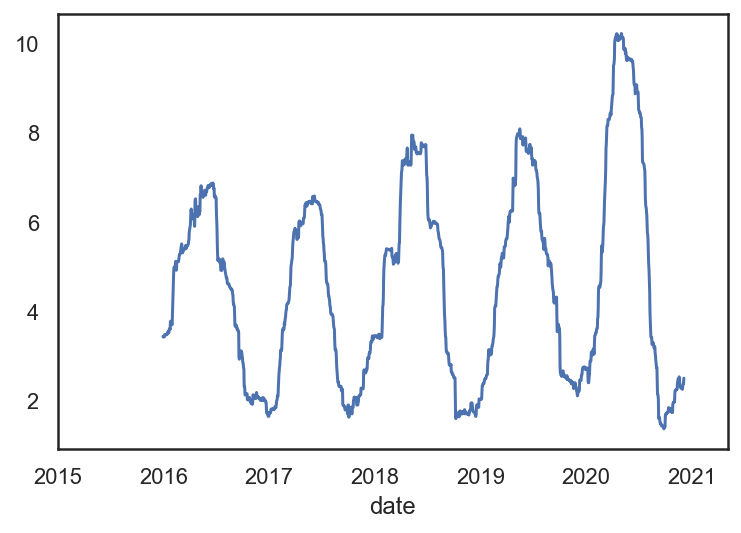

In [214]:
datas['ma_rain'] = datas['rain_fall'].rolling(window=152).mean()
datas['ma_rain'].plot()

In [298]:
datas.head(1)

,avg_price,max_price,min_price,avg_temp,max_temp,min_temp,rain_fall,paddy,field,total_field,cons_price,agr_price,ma_price,ma_temp,ma_rain,ma_min_temp,ma_max_temp
date,,,,,,,,,,,,,,,,,
2020-12-04,2682,3000,2500,1.2,6.8,-3.5,1.1,55.0,1461.0,1517.0,0.5,9.7,4074.763158,5.485526,2.491447,0.209868,11.236184


In [300]:
datas = datas.fillna(0)
datas = datas['2020-12-04':]
ma = datas[['ma_temp', 'ma_min_temp', 'ma_max_temp', 'ma_rain', 'avg_price']]

In [301]:
ma.to_csv(r'moving_data_final.csv')

<AxesSubplot:xlabel='date'>

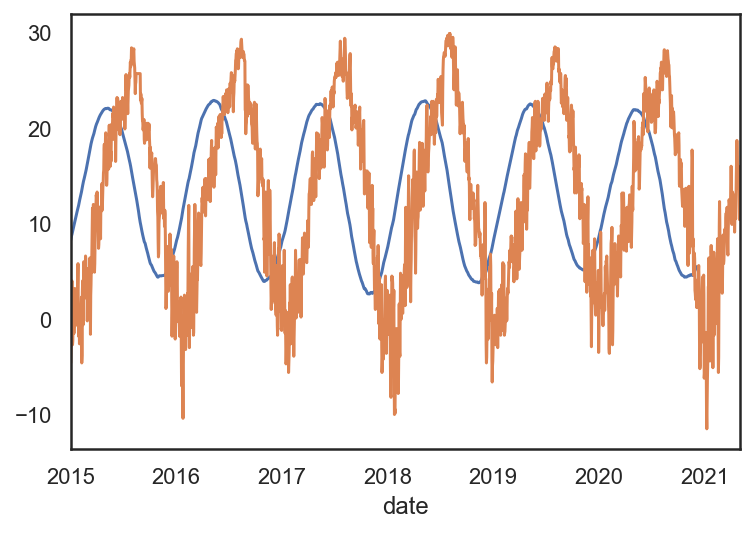

In [77]:
datas['ma_temp'] = datas['avg_temp'].rolling(window=152).mean().plot()
datas['avg_temp'].plot()

In [103]:
data = datas['2020-12-04':]
data.head(2)

,avg_price,max_price,min_price,avg_temp,max_temp,min_temp,rain_fall,paddy,field,total_field,cons_price,agr_price,ma_price,ma_temp,ma_rain,ma_min_temp,ma_max_temp
date,,,,,,,,,,,,,,,,,
2020-12-04,2682,3000,2500,1.2,6.8,-3.5,1.1,55.0,1461.0,1517.0,0.5,9.7,4074.763158,5.485526,0.648,0.209868,11.236184
2020-12-03,2682,3000,2500,2.7,7.7,-1.2,0.5,55.0,1461.0,1517.0,0.5,9.7,4068.723684,5.400000,0.656,0.129605,11.157895


In [41]:
# 데이터 프레임에 더해주기 
datas["ma_price"] = pd.DataFrame(ma_price)
datas["ma_temp"] = pd.DataFrame(ma_temp)
datas["ma_rain"] = pd.DataFrame(ma_rain)

In [95]:
data.to_excel(r"ma_data.xlsx")

In [101]:
simple_data = data[["avg_price", "ma_temp", "ma_min_temp", "ma_max_temp", "ma_rain"]]
simple_data.head()

,avg_price,ma_temp,ma_min_temp,ma_max_temp,ma_rain
date,,,,,
2020-12-04,2682,5.485526,0.209868,11.236184,0.648
2020-12-03,2682,5.400000,0.129605,11.157895,0.656
2020-12-02,2572,5.330921,0.083553,11.078289,0.444
2020-12-01,2612,5.265132,0.014474,11.015789,0.444
2020-11-30,2702,5.211184,-0.052632,10.975000,0.436


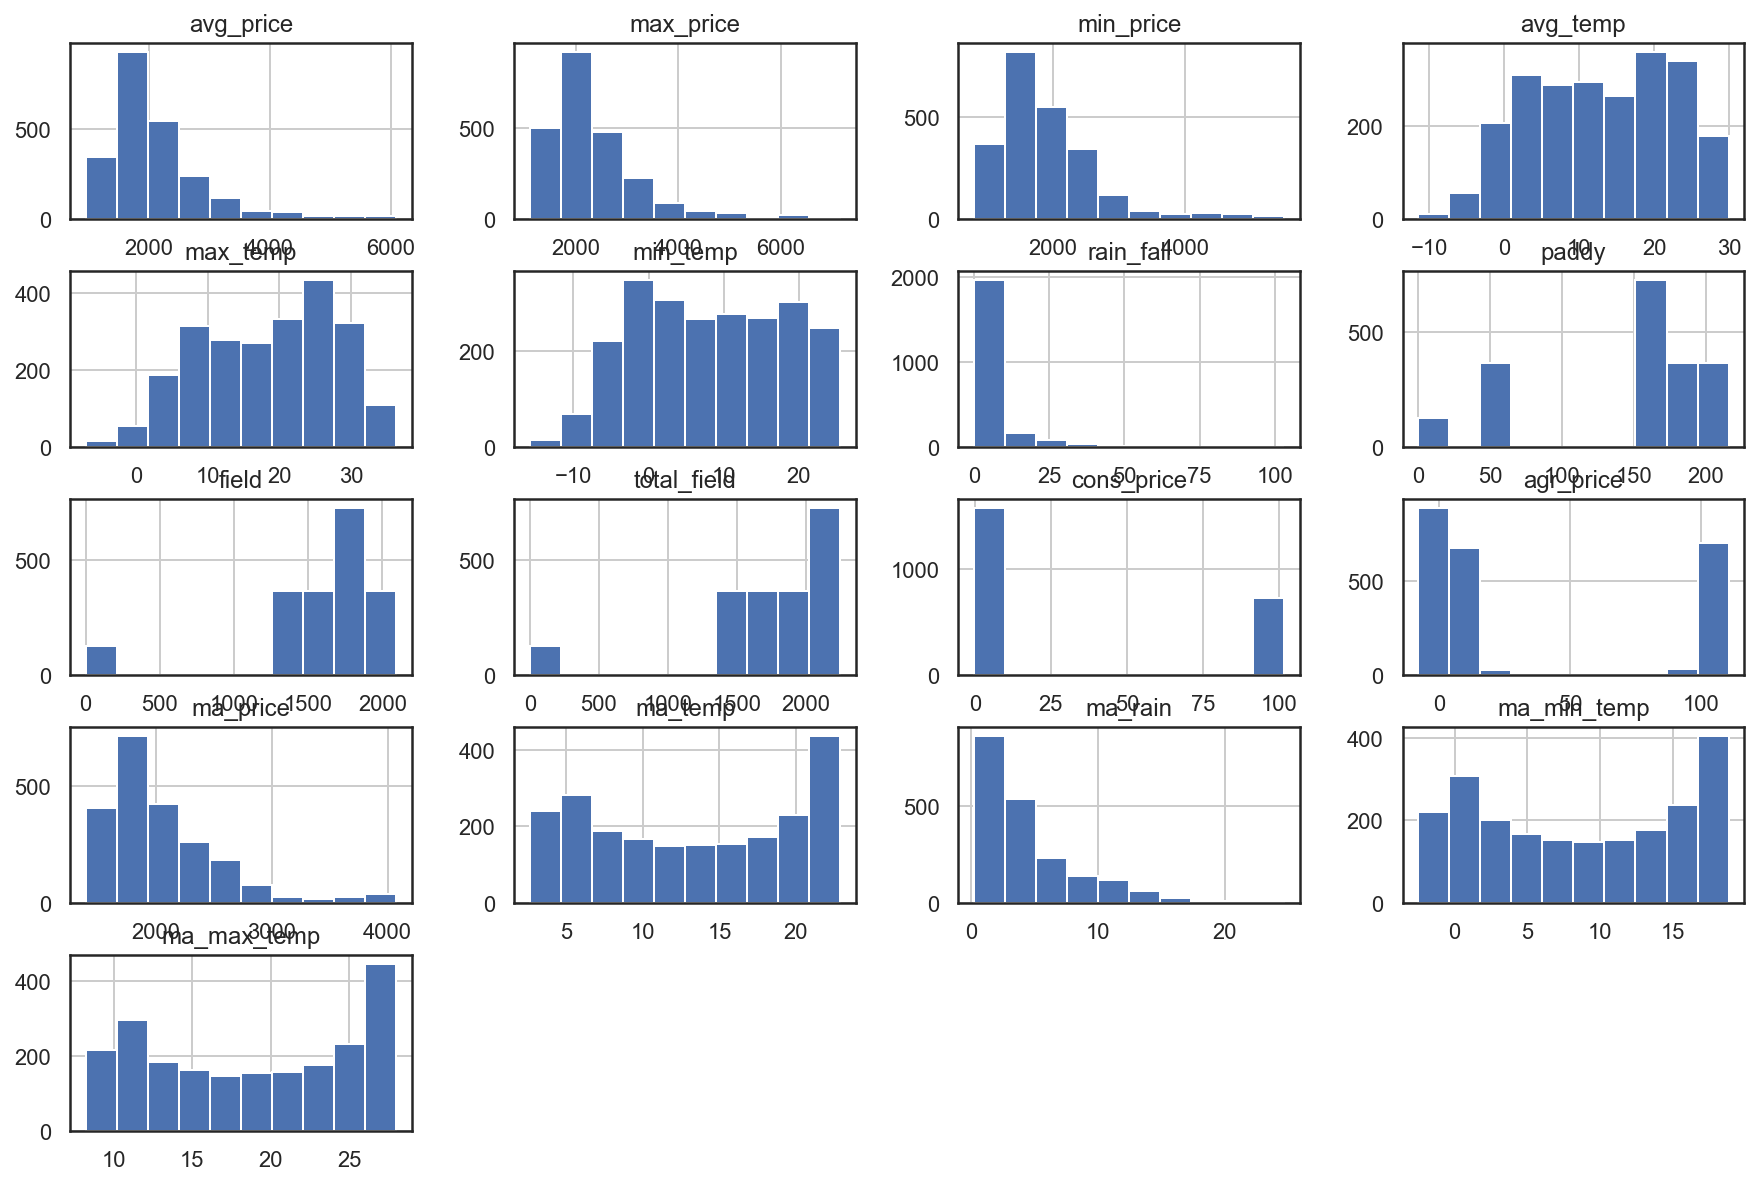

In [114]:
# 분포도를 확인해보았다. 
import matplotlib.pyplot as plt 
datas.hist(bins=10, figsize=(15,10))
plt.show()

In [131]:
d = datas.dropna()

In [256]:
X = d[["ma_temp", "agr_price", "total_field", "rain_fall"]]
y = pd.DataFrame(d['ma_price'])

In [133]:
y = d.astype({'ma_price' : 'int'})
y = y["ma_price"]
y

date
2020-12-04    4074
2020-12-03    4068
2020-12-02    4060
2020-12-01    4054
2020-11-30    4049
              ... 
2016-01-05    2588
2016-01-04    2588
2016-01-03    2587
2016-01-02    2586
2016-01-01    2585
Name: ma_price, Length: 1800, dtype: int64

In [257]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [258]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [259]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

models = []
models.append(('RandomForest Regressor (평균 제곱근오차, MSE):', RandomForestRegressor()))
models.append(('Linear Regressor', LinearRegression()))

In [137]:
from sklearn.model_selection import KFold, cross_val_score, KFold

results = []
names = []

for name, model in models: 
    kfold = KFold(n_splits=5, random_state=13, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,)
    results.append(cv_results)
    names.append(name)
    
    print(name, cv_results.mean(), cv_results.std())

RandomForest Regressor (평균 제곱근오차, MSE): 0.9830103374332309 0.00261119723941691
Linear Regressor 0.3565795201988142 0.04291023231700243


In [268]:
# Price = B1*Temp+B0

In [273]:
features = ["avg_temp"]
target = 'avg_price'

X = d[features]
y = d[target].values

In [274]:
print(X.shape)
print(y.shape)

(1800, 1)
(1800,)


In [276]:
from sklearn import linear_model
ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [277]:
model.coef_

array([-4.49433213])

In [278]:
model.intercept_

2063.3861821148193

In [304]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [ ]:
# Price = -4.49*Temp - 2063.38

In [279]:
model.score(X, y)

0.0053934280337292195

In [280]:
x_pred = np.array([15])
x_pred = x_pred.reshape(-1, len(features))

In [281]:
model.predict(x_pred)

array([1995.97120018])

In [308]:
x_pred = np.linspace(0, 40, 200)
x_pred = x_pred.reshape(-1, len(features))
y_pred = model.predict(x_pred)

ValueError: x and y must be the same size

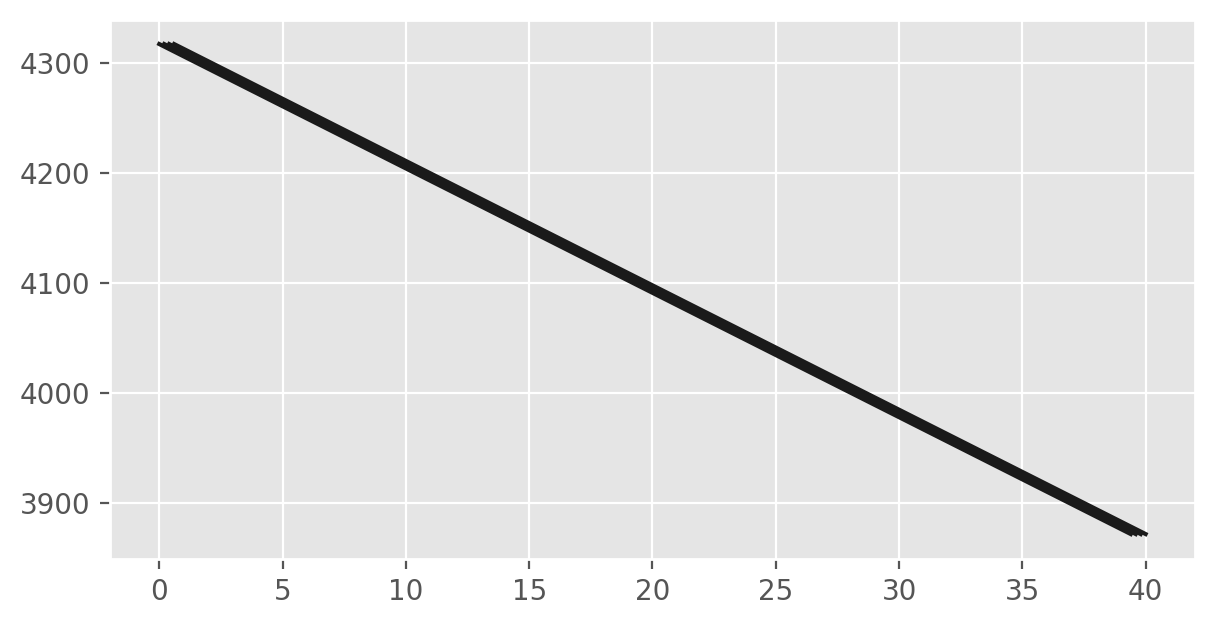

In [309]:
import matplotlib.pyplot as plt 

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(x_pred, y_pred, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='sample data')
ax.set_ylabel('Price', fontsize=14)
ax.set_xlabel('Temperature', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

In [287]:
# multi-linear model
# Price = B1*temp + B2*paddy ...

In [288]:
features = ["ma_temp", "agr_price", "total_field", "rain_fall"]
target = 'ma_price'

X = d[features].values.reshape(-1, len(features))
y = d[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [289]:
model.coef_

array([-15.60668213,   1.52004229,  -1.10351119,   3.87097289])

In [290]:
model.intercept_

4315.039267409659

In [ ]:
# Price = -15.606*temp + 1.52*agr_price - 1.103*total_field +3.87rainfall + 4315.04

In [291]:
model.score(X, y)

0.360556501815271

In [179]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [139]:
random_forest_tuning = RandomForestRegressor(random_state = 13)
param_grid = {
    'n_estimators' : [100, 200, 500],
    'max_features' : ['auto', 'sqrt', 'log2'], 
    'max_depth' : [4,5,6,7,8],
    'criterion' : ['mse', 'mae'],
}
GSCV = GridSearchCV(estimator=random_forest_tuning, param_grid=param_grid, cv=5)
GSCV.fit(X_train, y_train)
GSCV.best_params_

{'criterion': 'mse',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [177]:
rf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [180]:
random_forest = RandomForestRegressor(random_state = 13)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('MAE: ', mean_absolute_error(y_test, y_pred)) # 평균절대오차: 실제값과 예측 값과의 차이. 모든 절대 오차의 평균
print('MSE: ', mean_squared_error(y_test, y_pred)) # 평균제곱 오차: 오차의 제곱에 대한 평균을 취한 값

MAE:  19.066666666666666
MSE:  4130.02963111111


In [184]:
from math import sqrt 
print('RMSE: ', sqrt(mean_squared_error(y_test, y_pred)))

RMSE:  64.26530659003433


In [185]:
random_forest_out_of_bag = RandomForestRegressor(oob_score=True)
random_forest_out_of_bag.fit(X_train, y_train)
print(random_forest_out_of_bag.oob_score_) 

0.9828171530571711


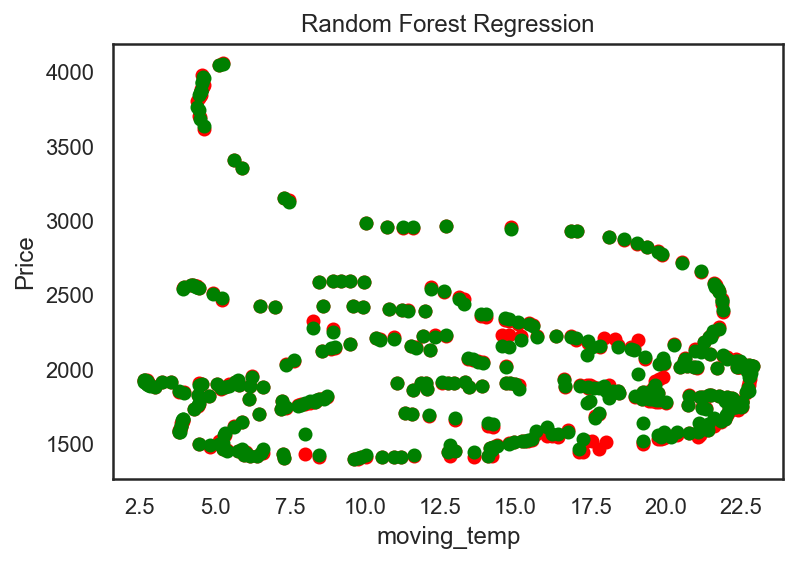

In [186]:
plt.scatter(X_test['ma_temp'].values, y_test, color = 'red')
plt.scatter(X_test['ma_temp'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('moving_temp')
plt.ylabel('Price')
plt.show() 

In [ ]:
# walk-forward validation
# https://www.youtube.com/watch?v=4rikgkt4IcU

In [ ]:
# transform into supervised learning problem

In [145]:
df = datas[['avg_price']].copy()

In [151]:
df.head()

,avg_price,target
date,,
2021-05-04,3600,3812.0
2021-05-03,3812,3532.0
2021-05-02,3532,3532.0
2021-05-01,3532,3532.0
2021-04-30,3532,3592.0


In [152]:
df["target"] = df.avg_price.shift(-1)
df.head()

,avg_price,target
date,,
2021-05-04,3600,3812.0
2021-05-03,3812,3532.0
2021-05-02,3532,3532.0
2021-05-01,3532,3532.0
2021-04-30,3532,3592.0


In [149]:
df.dropna(inplace=True)

In [153]:
def train_test_split(data, perc):
    data = data.values
    n = int(len(data) * (1 - perc))
    return data[:n], data[n:]

In [154]:
train, test = train_test_split(df, 0.2)

In [155]:
print(len(df))
print(len(train))
print(len(test))

2315
1852
463


In [156]:
X = train[:, :-1]
y = train[:, -1]

In [157]:
from xgboost import XGBRegressor

In [158]:
model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [159]:
test[0] #실제 데이터 

array([2320., 2440.])

In [160]:
val = np.array(test[0, 0]).reshape(1, -1)

pred = model.predict(val)
print(pred[0]) # 맞춘 데이터

2335.334


In [161]:
# Predict 

In [162]:
def xgb_predict(train, val):
    train = np.array(train)
    X, y = train[:, :-1], train[:, -1]
    model = XGBRegressor(objective="reg:squarederror", n_estimators=1000)
    model.fit(X, y)
    
    val = np.array(val).reshape(1, -1)
    pred = model.predict(val)
    return pred[0]

In [163]:
xgb_predict(train, test[0, 0])

2335.334

In [165]:
# walk-forward validation - one step forward prediction. 
# use train dataset, predict one step into the future, add that to trainset, retrain, predict second item, and add to trainset ...etc
# evaluate with RMSE metric

In [188]:
from sklearn.metrics import mean_squared_error

def validate(data, perc):
    predictions = []
    
    train, test = train_test_split(data, perc)
    
    history = [x for x in train]
    
    for i in range(len(test)):
        test_X, test_y = test[i, :-1], test[i, -1]
        
        pred = xgb_predict(history, test_X[0])
        predictions.append(pred)
        
        history.append(test[i])
        
    error = mean_squared_error(test[:, -1], predictions, squared=False)
    
    return error, test[:, -1], predictions

In [190]:
df = df.dropna()

In [191]:
%%time
rmse, y, pred = validate(df, 0.2)

print(rmse)

74.65464744046929
CPU times: user 38min 37s, sys: 36.4 s, total: 39min 13s
Wall time: 5min 52s


In [200]:
# 타임 시리즈 데이터를 다루기 좋은 형태로 바꾸기
# https://machinelearningmastery.com/random-forest-for-time-series-forecasting/#:~:text=Random%20Forest%20can%20also%20be,a%20supervised%20learning%20problem%20first.&text=Random%20Forest%20is%20an%20ensemble,classification%20and%20regression%20predictive%20modeling.
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    agg = pd.concat(cols, axis=1)
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

# train test split
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

# fit an random forest model and make a one step prediction
def random_forest_forecast(train, testX):
    train = np.asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test):
    predictions = list()
    train, test = train_test_split(data, n_test)
    history = [x for x in train]
    for i in range(len(test)):
        testX, testy = test[i, :-1], test[i, -1]
        yhat = random_forest_forecast(history, testX)
        predictions.append(yhat)
        history.append(test[i])
        print('>expected=%.1f, predicted=%.1f' % (testy, yhat))
    error = mean_absolute_error(test[:, -1], predictions)
    return error, test[:, -1], predictions

In [201]:
series = datas
values = series.values
data = series_to_supervised(values, n_in=6)
mae, y, yhat = walk_forward_validation(data, 12)
print('MAE: %.3f' % mae)

>expected=15.3, predicted=15.4
>expected=15.1, predicted=15.2
>expected=15.0, predicted=15.0
>expected=14.8, predicted=14.9
>expected=14.7, predicted=14.8
>expected=14.5, predicted=14.6
>expected=14.4, predicted=14.5
>expected=14.3, predicted=14.3
>expected=14.2, predicted=14.3
>expected=14.1, predicted=14.1
>expected=14.0, predicted=14.0
>expected=13.9, predicted=13.9
MAE: 0.070


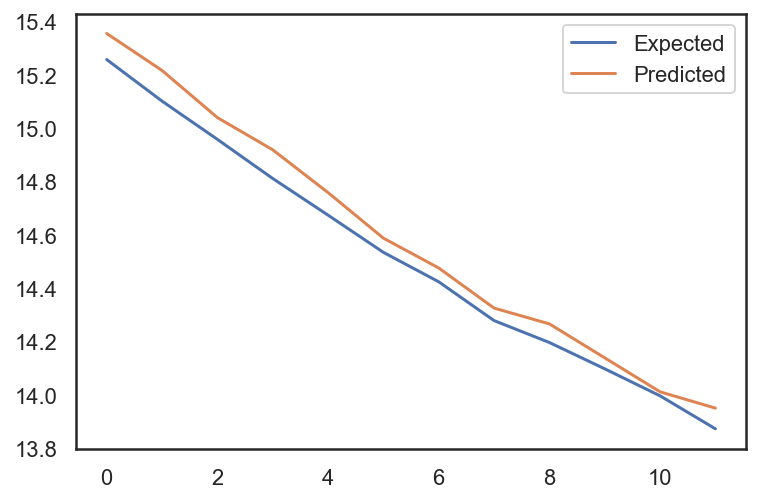

In [208]:
from matplotlib import pyplot
# plot expected vs predicted
pyplot.plot(y, label='Expected')
pyplot.plot(yhat, label='Predicted')
pyplot.legend()
pyplot.show()

<AxesSubplot:xlabel='date'>

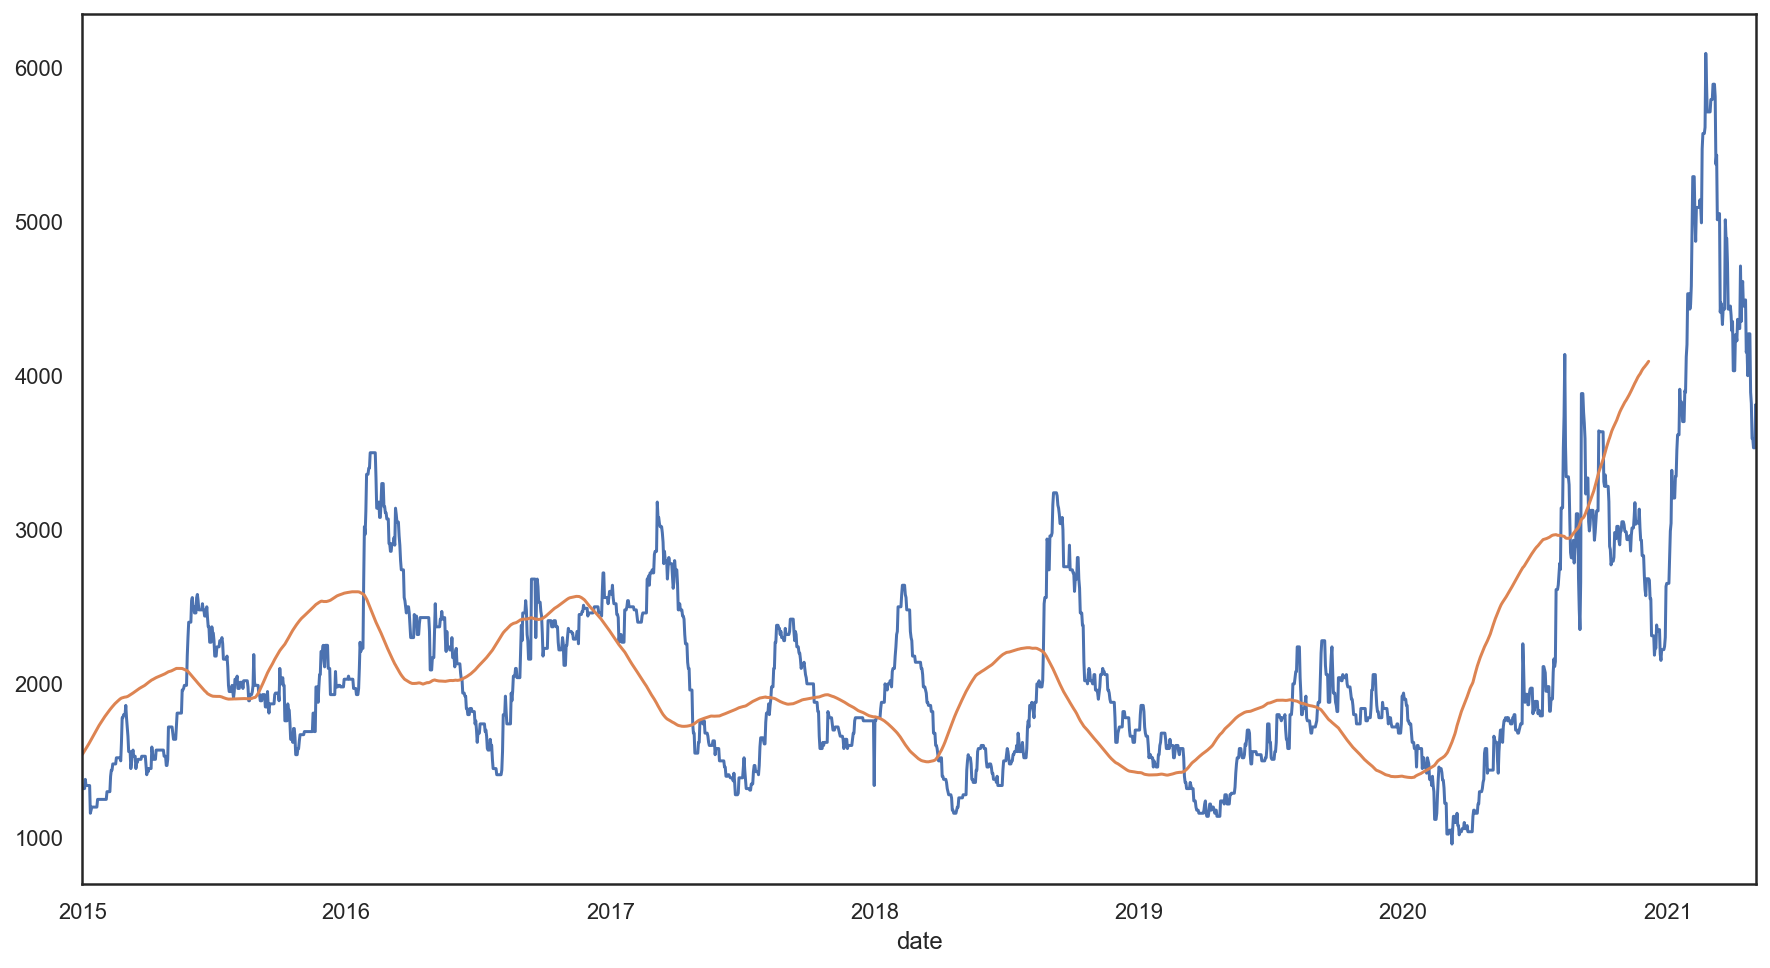

In [211]:
datas['avg_price'].plot(figsize=(15,8))
datas['avg_price'].rolling(window=150).mean().plot()


In [218]:
data = pd.read_csv(r'moving_average.csv')
data.head()

,date,avg_price,ma_temp,ma_min_temp,ma_max_temp,ma_rain
0,2020/12/04,2682,5.485526,0.209868,11.236184,0.648
1,2020/12/03,2682,5.400000,0.129605,11.157895,0.656
2,2020/12/02,2572,5.330921,0.083553,11.078289,0.444
3,2020/12/01,2612,5.265132,0.014474,11.015789,0.444
4,2020/11/30,2702,5.211184,-0.052632,10.975000,0.436


In [220]:
data = data.fillna(0)
data.head()

,date,avg_price,ma_temp,ma_min_temp,ma_max_temp,ma_rain
0,2020/12/04,2682,5.485526,0.209868,11.236184,0.648
1,2020/12/03,2682,5.400000,0.129605,11.157895,0.656
2,2020/12/02,2572,5.330921,0.083553,11.078289,0.444
3,2020/12/01,2612,5.265132,0.014474,11.015789,0.444
4,2020/11/30,2702,5.211184,-0.052632,10.975000,0.436


In [222]:
data.to_excel(r'moving_average.xlsx')
data.to_csv(r'moving_average.csv')